### Dia 1 - Importação de dados

In [138]:
import requests
import pandas as pd

Coletando dados

In [139]:
# Link do repositório e caminho para os arquivos CSV
endereco = "https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/tree/48684f508c0c9ad1d51975c72091b160dee66db4/Dia_1-Importando_dados/Datasets/dados_emprestimos"

# Extrair partes do link
partes = endereco.split("/")
usuario = partes[3]
repositorio = partes[4]
ramo = partes[6]
caminho_pasta = "/".join(partes[7:])

# Montar URL da API
url_api = f"https://api.github.com/repos/{usuario}/{repositorio}/contents/{caminho_pasta}?ref={ramo}"

# Fazer requisição
resposta = requests.get(url_api)

# Lista para armazenar os DataFrames
lista_dfs = []

if resposta.status_code == 200:
    arquivos = resposta.json()
    for arquivo in arquivos:
        if arquivo['name'].endswith('.csv'):
            url_raw = arquivo['download_url']
            df = pd.read_csv(url_raw)
            lista_dfs.append(df)

Concatenando os DataFrames

In [140]:
# Concatenar todos os DataFrames

emprestimos_biblioteca = pd.concat(lista_dfs, ignore_index=True)

# Exibir os primeiros dados
emprestimos_biblioteca

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
...,...,...,...,...,...,...,...
2258013,2989086,2008047044,NaN,2020/05/05 19:51:06.059000000,2021/05/13 14:53:31.000000000,3.067431e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO
2258014,2989087,2008047047,NaN,2020/05/05 19:51:06.135000000,2021/05/13 14:53:38.000000000,3.067431e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO
2258015,2989088,2010052905,NaN,2020/05/05 19:51:06.164000000,2021/05/13 15:01:46.000000000,3.067431e+06,SERVIDOR TÉCNICO-ADMINISTRATIVO
2258016,2989089,2010048023,NaN,2020/06/09 11:54:02.669000000,2021/07/21 15:33:55.000000000,2.020101e+10,ALUNO DE PÓS-GRADUAÇÃO


Verificando duplicatas

In [141]:
emprestimos_biblioteca.value_counts()

id_emprestimo  codigo_barras  data_renovacao                 data_emprestimo                data_devolucao                 matricula_ou_siape  tipo_vinculo_usuario  
709704         2006021442     2010/01/17 18:56:43.923000000  2010/01/04 09:58:46.522000000  2010/02/01 13:59:02.528000000  2.008010e+09        ALUNO DE GRADUAÇÃO        7
709705         2009032168     2010/01/17 18:56:43.909000000  2010/01/04 09:58:46.549000000  2010/01/20 13:14:34.464000000  2.008010e+09        ALUNO DE GRADUAÇÃO        7
709698         2009047725     2010/01/18 14:44:41.163000000  2010/01/04 09:21:19.099000000  2010/02/02 12:02:38.444000000  2.009047e+09        ALUNO DE GRADUAÇÃO        3
709686         2006017618     2010/01/26 08:07:01.738000000  2010/01/04 08:08:44.081000000  2010/02/25 07:36:25.800000000  2.008112e+09        ALUNO DE PÓS-GRADUAÇÃO    2
2461099        2012008348     2016/06/27 20:35:46.855000000  2016/06/14 11:20:33.254000000  2016/07/11 14:37:29.000000000  2.015022e+09        ALUNO D

Excluindo duplicatas

In [142]:
emprestimos_biblioteca.duplicated().sum()  # Verificando duplicatas

37

In [143]:
emprestimos_biblioteca.drop_duplicates(inplace=True)  # Removendo duplicatas

In [144]:
emprestimos_biblioteca.value_counts()

id_emprestimo  codigo_barras  data_renovacao                 data_emprestimo                data_devolucao                 matricula_ou_siape  tipo_vinculo_usuario  
709686         2006017618     2010/01/26 08:07:01.738000000  2010/01/04 08:08:44.081000000  2010/02/25 07:36:25.800000000  2.008112e+09        ALUNO DE PÓS-GRADUAÇÃO    1
2336122        2011033079     2016/11/21 02:01:58.488000000  2016/11/10 17:00:12.989000000  2016/12/02 14:21:49.000000000  2.016023e+09        ALUNO DE GRADUAÇÃO        1
2336103        2014085936     2016/11/25 19:25:36.215000000  2016/11/10 16:54:52.447000000  2016/12/13 14:30:52.000000000  2.014047e+09        ALUNO DE GRADUAÇÃO        1
2336104        2011027960     2016/11/23 17:27:54.642000000  2016/11/10 16:55:17.956000000  2016/11/28 10:32:38.000000000  2.016083e+09        ALUNO DE GRADUAÇÃO        1
2336105        2014000897     2016/12/02 15:02:53.356000000  2016/11/10 16:55:19.851000000  2016/12/23 13:53:23.000000000  2.014071e+09        ALUNO D

In [145]:
emprestimos_biblioteca.head()  # Exibir as primeiras linhas do DataFrame

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
8,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2.009046e+09,ALUNO DE GRADUAÇÃO


Importando mais dados (arquivo parquet)

In [146]:
dados_exemplares = pd.read_parquet('https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_1-Importando_dados/Datasets/dados_exemplares.parquet')
dados_exemplares

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15
...,...,...,...,...,...,...,...
568580,1353472,2021011150,Acervo Circulante,Biblioteca Setorial do Núcleo de Educação da I...,REGULAR,951,268231
568581,1353473,2019013454,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,997,268233
568582,1353474,2019012811,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,987,268234


Unindo os DataFrames

In [147]:
emprestimos_completo = emprestimos_biblioteca.merge(dados_exemplares)
emprestimos_completo

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2.008050e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,2.007226e+08,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2072517,2989018,2009036492,NaN,2020/03/17 19:49:10.187000000,2020/12/03 08:12:20.000000000,2.015011e+10,ALUNO DE GRADUAÇÃO,274820,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,676,120845
2072518,2989020,2014062640,NaN,2020/03/17 19:51:15.700000000,2021/01/07 11:16:28.000000000,2.019004e+10,ALUNO DE GRADUAÇÃO,1157915,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,228,213248
2072519,2989032,2018003324,NaN,2020/03/17 20:00:11.416000000,2021/08/30 13:29:44.000000000,2.019102e+10,ALUNO DE PÓS-GRADUAÇÃO,1317173,Acervo Circulante,Biblioteca Setorial da Faculdade de Ciências d...,REGULAR,784,255835
2072520,2989049,2006024313,NaN,2020/03/17 20:47:18.741000000,NaN,2.015013e+10,ALUNO DE GRADUAÇÃO,206073,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,663,82178


### Dia 2 - As primeiras manipulações

In [148]:
emprestimos_completo.head()  # Exibir as primeiras linhas do DataFrame completo

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2.008050e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,2.007226e+08,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009


Atribuir a coluna com nomenclatura da CDU

In [149]:
CDU_lista = []
for CDU in emprestimos_completo['localizacao']:
    if(CDU < 100):
        CDU_lista.append('Generalidades')
    elif(CDU < 200):
        CDU_lista.append('Filosofia e Psicologia')
    elif(CDU < 300):
        CDU_lista.append('Religião')
    elif(CDU < 400):
        CDU_lista.append('Ciências Sociais')
    elif(CDU < 500):
        CDU_lista.append('Classe vaga')
    elif(CDU < 600):
        CDU_lista.append('Matemática e ciências naturais')
    elif(CDU < 700):
        CDU_lista.append('Ciências aplicadas')
    elif(CDU < 800):
        CDU_lista.append('ABelas artes')
    elif(CDU < 900):
        CDU_lista.append('Linguagem. Língua. Linguística')
    else:
        CDU_lista.append('Geografia. Biografia. História')

emprestimos_completo['CDU_geral'] = CDU_lista

In [150]:
emprestimos_completo.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema,CDU_geral
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2.009122e+09,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,4225,Ciências aplicadas
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2.008050e+09,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,2.007226e+08,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,25009,Ciências aplicadas


Excluir a coluna "registro_sistema"

In [151]:
emprestimos_completo.drop(columns=['registro_sistema'], inplace=True)  # Excluir a coluna "registro_sistema"

Modificar o tipo de dado da matrícula

In [152]:
emprestimos_completo['matricula_ou_siape'] = emprestimos_completo['matricula_ou_siape'].astype(str)  # Modificar o tipo de dado da matrícula

### Dia 3 - Análise exploratória de dados e DateTime

Bora explorar como evoluíram os empréstimos com o decorrer do tempo?

A diretoria da biblioteca gostaria de entender se a quantidade de empréstimos está diminuindo, aumentando ou permanecendo igual ao decorrer dos últimos anos.

Para isso, verifique qual é a quantidade total de exemplares emprestados por cada ano e plote um gráfico de linhas.

Depois, faça uma análise em relação à visualização gerada.

Atente-se para a quantidade de exemplares emprestados, e não de empréstimos realizados.

A diretoria também gostaria de gerenciar melhor os recursos humanos da biblioteca de acordo com a demanda de trabalho existente. Por exemplo:


gerenciar a programação de férias dos colaboradores de acordo com os meses de menor demanda;
programar atividades que não sejam de atendimento ao usuário para períodos específicos de menor demanda.

Há uma suspeita interna de que os meses com maior número de exemplares emprestados sejam março e setembro, mas não foi realizada uma análise real sobre isso.

Portanto, gere uma tabela com a quantidade total de exemplares emprestados por mês e descubra quais meses são os que possuem a maior quantidade de empréstimos realizados. Plote um gráfico de linhas.

Traga suas análises em relação a quais meses poderiam ser as melhores opções.

Além do gerenciamento anual das atividades, a diretoria também necessita que seja planejada uma programação diária das atividades. Por este motivo, verifique quais foram os horários com maior quantidade de empréstimos ao longo de um dia inteiro.

Plote um gráfico de barras e analise quais seriam os melhores horários para alocar as demais atividades que não sejam de atendimento ao usuário.

In [153]:
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [154]:
emprestimos_completo.head()  # Exibir as primeiras linhas do DataFrame completo

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU_geral
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,726965,L095049,2010/03/31 12:41:08.684000000,2010/03/01 12:40:56.212000000,2010/04/30 14:42:35.366000000,2009121584.0,ALUNO DE PÓS-GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
2,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
3,717763,L167050,NaN,2010/02/11 11:16:30.335000000,2010/03/04 08:54:32.262000000,2008050352.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
4,729996,L167050,2010/03/17 09:08:26.874000000,2010/03/04 13:36:26.599000000,2010/03/31 18:04:29.669000000,200722565.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas


A quantidade de empréstimos está diminuindo, aumentando ou permanecendo igual ao decorrer dos últimos anos?

In [155]:
emprestimos_completo['id_emprestimo'].value_counts()

id_emprestimo
2010326     3
2014596     3
10240112    3
2422542     3
9690168     3
           ..
2767562     1
2317930     1
2283256     1
2262867     1
2989061     1
Name: count, Length: 2068724, dtype: int64

Quantos empréstimos foram realizados ao total?

In [156]:
emprestimos = len(emprestimos_completo['id_emprestimo'].drop_duplicates())
emprestimos

2068724

Quantos exemplares foram emprestados ao total ?

In [157]:
exemplares = len(emprestimos_completo)
exemplares

2072522

Quantidade de exemplares emprestados por ano

In [158]:
emprestimos_por_ano = pd.DataFrame(emprestimos_completo['data_emprestimo'].value_counts().reset_index())
emprestimos_por_ano.columns = ['data', 'quantidade']
emprestimos_por_ano['data'] = pd.to_datetime(emprestimos_por_ano['data'])
emprestimos_por_ano

,data,quantidade
0,2017-04-20 21:07:44.036,3
1,2014-05-12 09:56:18.787,3
2,2015-05-05 20:37:19.551,3
3,2018-02-22 10:45:11.523,3
4,2014-01-28 14:49:50.505,3
...,...,...
2068686,2012-04-11 10:12:20.960,1
2068687,2010-11-12 11:03:22.117,1
2068688,2015-09-15 14:26:08.838,1
2068689,2015-08-14 13:41:47.472,1


In [159]:
emprestimos_por_ano['ano'] = emprestimos_por_ano['data'].dt.year
emprestimos_agrupados_ano = emprestimos_por_ano.groupby('ano')['quantidade'].sum().reset_index()
emprestimos_agrupados_ano

,ano,quantidade
0,2010,161394
1,2011,196390
2,2012,221365
3,2013,234749
4,2014,219189
5,2015,213582
6,2016,215900
7,2017,218462
8,2018,194080
9,2019,171801


Grafico da quantidade total de exemplares emprestados por cada ano

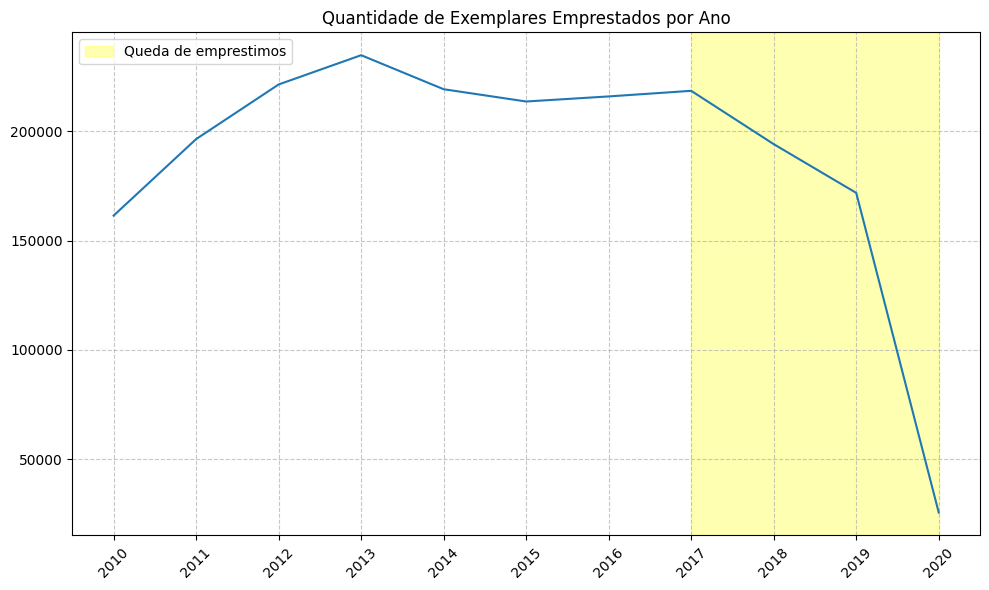

In [160]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=emprestimos_agrupados_ano, x='ano', y='quantidade')
ax.set(xlabel=None, ylabel=None)
plt.title('Quantidade de Exemplares Emprestados por Ano')

# Destaque da região de 2017 a 2020
plt.axvspan(2017, 2020, color='yellow', alpha=0.3, label='Queda de emprestimos')
plt.legend()

plt.xticks(emprestimos_agrupados_ano['ano'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Houve uma queda no número de exemplares à partir de 2013, ficando mais perceptivel de 2017 até 2020.

2020 ficou muito menor, provavelmente devido a pandemia (apenas 25610 exemplares emprestados).

Quantos foram por cada mês?

In [161]:
emprestimos_por_ano['mes'] = emprestimos_por_ano['data'].dt.month
emprestimos_por_mes = emprestimos_por_ano.groupby('mes')['quantidade'].sum().reset_index()
emprestimos_por_mes.set_index('mes', inplace=True)
emprestimos_por_mes

,quantidade
mes,
1,67514
2,210200
3,252185
4,208725
5,202530
6,138123
7,123790
8,232793
9,208234


Modificando os números por nomes dos meses

In [162]:
dicionario_meses = {
    1: 'Jan', 2: 'Fev', 3: 'Mar',
    4: 'Abr', 5: 'Mai', 6: 'Jun',
    7: 'Jul', 8: 'Ago', 9: 'Set',
    10: 'Out', 11: 'Nov', 12: 'Dez'}

In [163]:
emprestimos_por_mes.index = emprestimos_por_mes.index.map(dicionario_meses)
emprestimos_por_mes

,quantidade
mes,
Jan,67514
Fev,210200
Mar,252185
Abr,208725
Mai,202530
Jun,138123
Jul,123790
Ago,232793
Set,208234


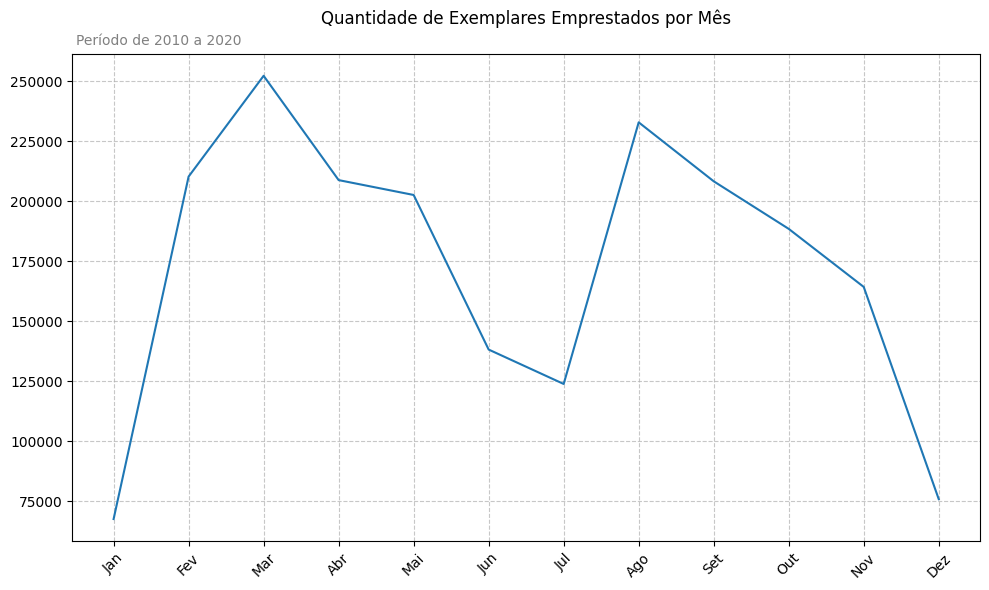

In [164]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=emprestimos_por_mes, x=emprestimos_por_mes.index, y='quantidade')
ax.set(xlabel=None, ylabel=None)
plt.title('Quantidade de Exemplares Emprestados por Mês'+'\n')
ax.text(s='Período de 2010 a 2020',x=-0.5,y=265000,fontsize=10, ha='left',color='gray')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Os meses com maiores números de exemplares emprestados foram em março e agosto.

Janeiro, julho e dezembro são os menores números, provavelmente por ser meses de férias.

Qual é a quantidade de empréstimos por hora ao longo do dia ?

In [165]:
emprestimos_por_ano.data

0         2017-04-20 21:07:44.036
1         2014-05-12 09:56:18.787
2         2015-05-05 20:37:19.551
3         2018-02-22 10:45:11.523
4         2014-01-28 14:49:50.505
                    ...          
2068686   2012-04-11 10:12:20.960
2068687   2010-11-12 11:03:22.117
2068688   2015-09-15 14:26:08.838
2068689   2015-08-14 13:41:47.472
2068690   2020-03-17 21:22:22.138
Name: data, Length: 2068691, dtype: datetime64[ns]

In [166]:
emprestimos_por_hora = emprestimos_por_ano.groupby(emprestimos_por_ano['data'].dt.hour)['quantidade'].sum()
emprestimos_por_hora.index.name = 'horas'
emprestimos_por_hora = emprestimos_por_hora.reset_index()
emprestimos_por_hora

,horas,quantidade
0,0,17
1,6,14
2,7,18777
3,8,103416
4,9,131273
5,10,185839
6,11,180048
7,12,148754
8,13,126987
9,14,150876


In [167]:
emprestimos_por_hora = emprestimos_por_hora.sort_values(ascending=True, by='quantidade')

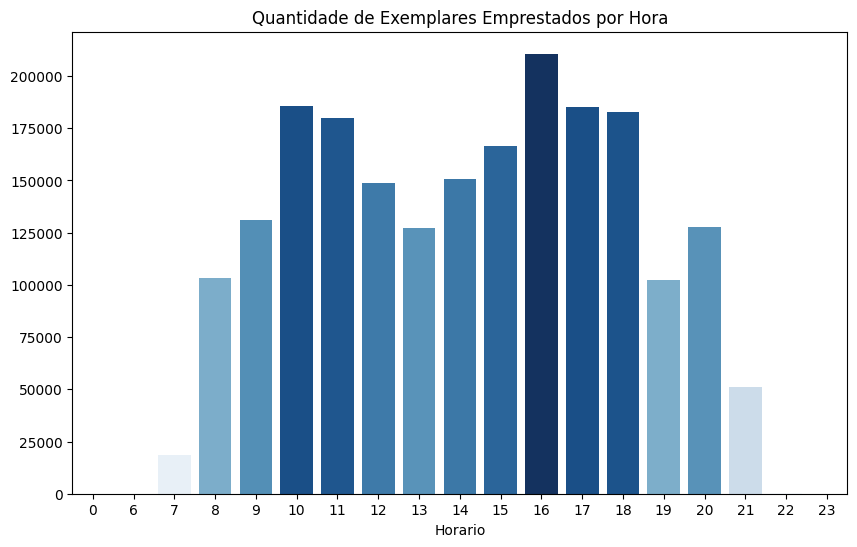

In [168]:
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=emprestimos_por_hora, x='horas', y='quantidade', palette='Blues', hue='quantidade', dodge=False)

plt.legend([], [], frameon=False)

ax.set(xlabel='Horario', ylabel=None)
ax.set_title('Quantidade de Exemplares Emprestados por Hora')

ax=ax

Os picos de atendimento para empréstimos são às 10hs e 16hs.